# Get the libraries

In [854]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd


# Job Data Acquisition

Open the VanHack Job page and parse it using BeautifulSoup library

In [163]:
jobpage = urrli.request.urlopen('https://app.vanhack.com/')

In [164]:
soup = BeautifulSoup(jobpage, 'html.parser')

Get all the div into one list for further analysis

In [165]:
job_list = soup.findAll('div')

The jobs found on the first page of the site have the attribute 'data-id'. I get the first one as is the most recent job available

In [166]:
for element in job_list:
    if(element.get('data-id')):
        lastJobId = int(element.get('data-id'))
        #print(lastJobId)
        break

For this demo project I'm using the last 100 jobs on the site. So the next step is to do more web scrapping on VanHack jobs getting the information for each of the job posting.

In [936]:
numberOfJobs = 100  # you can change this number to modify the number of jobs to get from VanHack site.

In [937]:
#define dataset columns and create the dataframe
general_column_names = ['job_title', 'city', 'country']
jobs_df = pd.DataFrame(columns=general_column_names)

# Web Scrapping VanHack Jobs site

In [938]:
for i in range(lastJobId- numberOfJobs, lastJobId+1):
    job_detail_page = urllib.request.urlopen('https://app.vanhack.com/JobBoard/JobDetails?idJob=' + str(i))
    soup = BeautifulSoup(job_detail_page, 'html.parser')
    
    #job title
    job_title = soup.find('h1', attrs={'class':'page-title'})
    
    #location
    aux_blocks = soup.findAll('div', attrs={'class':'block-list-aux'})
    location_block = aux_blocks[0].find('p', attrs={'class':'text-block-subtitle'})
    city = location_block.text.split('-')[0]
    country = location_block.text.split('-')[1]
    
    #skills -> lets create a column for each different skill obtained during the webscrapping
    articles = soup.findAll('article')
    skills = (articles[1].find('ul'))
    skills_list = []
    buff = []
    for c in skills.text:
        if c == '\n':
            skills_list.append(''.join(buff))
            buff = []
        else:
            buff.append(c)
    if(skills_list[0]==''):
        skills_list.pop(0)
        
    skills_column_names = skills_list
    
    row = [job_title.text, city, country] + [1] * len(skills_list)
    
    tmp = pd.DataFrame([row], columns=general_column_names+skills_column_names)      
    jobs_df = jobs_df.append(tmp, ignore_index=True)


In [939]:
jobs_df.shape

(101, 242)

In [940]:
# just to display a sample of what we got
jobs_df.head(10)

,.net,3d design,Big Data,NetSuite,adwords,agile,agile methodologies,alamofire,amazon web services,analysis,...,web server,webpack,websocket,windows,wordpress,wpf,xaml,xcode,xml,zend framework
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a lot of NaN values on the skills columns as each job has its own skills requirements

In [941]:
# fill the Skills NaN values with 0
jobs_df = jobs_df.fillna(value=0)

In [942]:
# Just to see how it looks after filling the NaN values with 0
jobs_df.head(5)

,.net,3d design,Big Data,NetSuite,adwords,agile,agile methodologies,alamofire,amazon web services,analysis,...,web server,webpack,websocket,windows,wordpress,wpf,xaml,xcode,xml,zend framework
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [943]:
# Lets see the amount of jobs per city
jobs_df.groupby(['city']).size()

city
Amsterdam             4
Berlin                4
Bertrange             6
Brussels              1
Calgary               2
Den Haag              1
Dublin                2
Frankfurt             1
Helsinki              4
Kelowna               1
Kitchener             5
Lisbon                1
Luxembourg            4
Luxembourg City       4
Luxembourg City,      6
Malta/Gozo            3
Melbourne             1
Mexico City           2
Montreal              2
Nuremberg             5
Porto                 1
Redwood               1
Toronto               5
Utrecht               5
Vancouver            21
Victoria              1
Waterloo              3
Winnipeg              5
dtype: int64

But it is better to see this in a graphical way

In [944]:
# Lets import the libraries
import matplotlib.pyplot as plt
%matplotlib inline

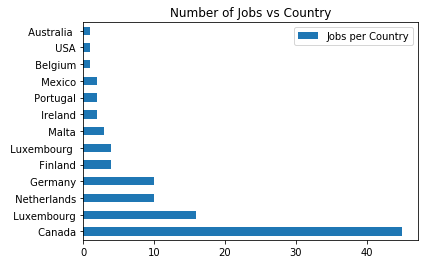

In [945]:
jobs_df['country'].value_counts().plot(kind='barh', legend=True, title='Number of Jobs vs Country', label="Jobs per Country")

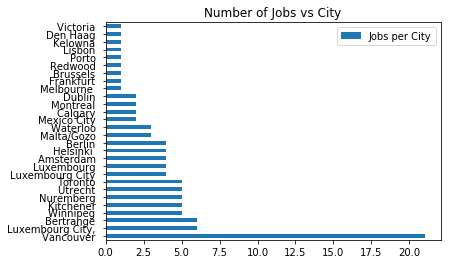

In [946]:
jobs_df['city'].value_counts().plot(kind='barh', legend=True, title='Number of Jobs vs City', label="Jobs per City")

And I guess that is why VanHack is call VANhack

# Skills Analysis

In [949]:
# Now lets put Skills on perspective
popular_skills = pd.DataFrame(jobs_df.sum())

In [951]:
popular_skills.columns=['count']

In [989]:
popular_skills.sort_values(by='count', ascending=False).head(15)

,count
javascript,20
java,17
python,15
css3,13
sql,13
html5,12
aws,12
c++,10
c#,10
react,9


In [953]:
# We need to delete city, country and job_title columns as they are not requiered for the analysis
popular_skills = popular_skills.drop(['city','country','job_title'])

In [954]:
# we can export this dataset for future analysis
popular_skills.to_csv('skills.csv')

And now we can see the most required skills on the las 100 VanHack jobs, way to go Javascript! 
...but Luckly form me Python is very important as well!

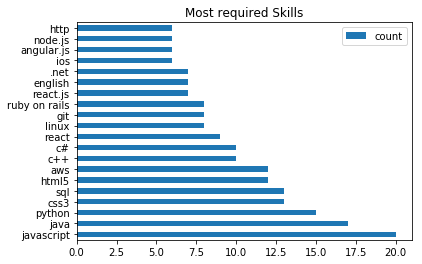

In [955]:
popular_skills.sort_values(by=['count'], ascending=False).head(20).plot(kind='barh', legend=True, title="Most required Skills", label="Skill count")

# Enhance Job Listing

Finally lets enhance the job listing obtained on VanHack acquiring data from Glassdoor.
First, let see which are the most demanded job titles on VanHack

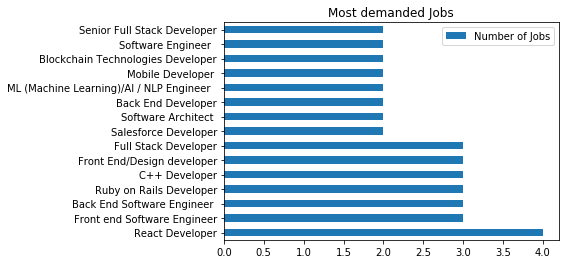

In [971]:
jobs_df['job_title'].value_counts().head(15).plot(kind='barh', legend=True, title="Most demanded Jobs", label="Number of Jobs")

In order to enhance the job listing, lets try to get the average salary for that job position on a site like Glassdoor.com

To do that we have to do some more web scrapping but now on the Glassdoor site. The structure of a salary link is the followin one:
https://www.glassdoor.com/Salaries/backend-software-engineer-salary-SRCH_KO0,25.htm

Where "backend-software-engineer" is the correct format for the job title. Additionally the 0,25 means the length of the job title string.

Based on this, we need to clean the job_title values on the dataframe, so we can get the information from the site. The next function has this job.

In [957]:
def clean_job_title(title):
    delete_list = ["(m/f)", "(", ")", "–", "junior", "senior", "+", "#"]
    title = title.lower()
    for string_to_delete in delete_list:
        title = title.replace(string_to_delete, "")
    title = title.replace(" ", "-").replace("/", "-")
    out_string=""
    for c in title:
        if (len(out_string)>0):
            if(c=="-"):
                if (out_string[-1]!="-"):
                    out_string = out_string+c
            else:
                out_string = out_string+c
        else:
            out_string = out_string+c
    title = out_string
    if (title[0]=="-"):
        title = title[1:]
    if (title[-1]=="-"):
        title = title[:-1]   
    return title.encode('ascii', 'ignore').decode('ascii')

# Web Scrapping Glassdoor

One we have our job titles in the correct format, lets create a function to get the average salary for that position on Glassdoor. Additional to average salary, lets also get the minimum and maximum salary for reference, so the function return a list with the minimum, maximum and average salary for that job position.

In [958]:
def webscrapping_glassdoor_salaries(job_title):
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers={'User-Agent':user_agent} 
    
    glassdoor_salaries_base_url= "https://www.glassdoor.com/Salaries/"
    req = urllib.request.Request(glassdoor_salaries_base_url + job_title + "-salary-SRCH_KO0," + str(len(job_title)) + ".htm", headers = headers)
    print(glassdoor_salaries_base_url + job_title + "-salary-SRCH_KO0," + str(len(job_title)) + ".htm")
    
    glassdoor_salaries_page = urllib.request.urlopen(req)
    soup_salaries = BeautifulSoup(glassdoor_salaries_page, 'html.parser')
    
    if (h1_result[0:17] == "No current report"):
        return([0,0,0])
    else:
        average_salary = soup_salaries.find(class_='OccMedianBasePayStyle__payNumber')
        if not(average_salary):
            average_salaries = soup_salaries.findAll('div', attrs={'class':'RangeBarStyle__values flex__justifySpaceBetween flex__container '})
            #print(average_salaries[0].text)
            min_low = 0
            max_high = 0        
            for element in average_salaries:
                index = element.text.find('K')
                if (index>0):
                    low_high_salary = element.text.replace('$','')
                    low_high_salary = low_high_salary.split('K')
                    low_high_salary[2] = 0
                    low_high_salary = [int(i) for i in low_high_salary]
                    if (min_low==0):
                        min_low = low_high_salary[0]
                        max_high = low_high_salary[1]
                    else:
                        if(min_low > low_high_salary[0]):
                            min_low = low_high_salary[0]
                        if(max_high < low_high_salary[1]):
                            max_high = low_high_salary[1]                
            return([min_low, max_high, (max_high+min_low)/2])
        else:
            #print(average_salary.text)
            average_salary = int(average_salary.text.replace('$','').replace('K','').replace(',',''))/1000
            min_salary = soup_salaries.find('div', attrs={'class':'HistogramStyle__labelWrapper','data-key':'0'})
            min_low = int(min_salary.text[:-3].replace('$','').replace('K',''))
            max_salary = soup_salaries.find('div', attrs={'class':'HistogramStyle__labelWrapper','data-key':'9'})
            max_high = int(max_salary.text[:-4].replace('$','').replace('K',''))
            return([min_low,  max_high, average_salary])

Now lets build a new dataframe and fill it the salary information. For that lets iterate over the jobs_df dataframe and apply the functions

In [926]:
salaries_columns = ['min_salary_USDK', 'max_salary_USDK', 'average_salary_USDK']
salaries = pd.DataFrame(columns=salaries_columns)
for index, row in jobs_df.iterrows():    
    position = clean_job_title(row['job_title'])
    print(position)
    glassdoor_ref_salaries = webscrapping_glassdoor_salaries(position)
    print(glassdoor_ref_salaries)
    salaries.loc[len(salaries)] = glassdoor_ref_salaries
print(salaries)    

data-scientist-machine-learning-engineer
https://www.glassdoor.com/Salaries/data-scientist-machine-learning-engineer-salary-SRCH_KO0,40.htm
[87, 158, 120.931]
data-scientist-marketing-analytics-projects
https://www.glassdoor.com/Salaries/data-scientist-marketing-analytics-projects-salary-SRCH_KO0,43.htm
[0, 0, 0.0]
data-scientist
https://www.glassdoor.com/Salaries/data-scientist-salary-SRCH_KO0,14.htm
[87, 158, 120.931]
java-web-developer
https://www.glassdoor.com/Salaries/java-web-developer-salary-SRCH_KO0,18.htm
[56, 128, 88.488]
operations-engineer-devops
https://www.glassdoor.com/Salaries/operations-engineer-devops-salary-SRCH_KO0,26.htm
[62, 118, 83.498]
software-developer-front-end-web
https://www.glassdoor.com/Salaries/software-developer-front-end-web-salary-SRCH_KO0,32.htm
[59, 115, 79.604]
full-stack-web-developer-remote
https://www.glassdoor.com/Salaries/full-stack-web-developer-remote-salary-SRCH_KO0,31.htm
[0, 0, 0.0]
frontend-software-developer
https://www.glassdoor.com/Sa

[61, 104, 79.954]
front-end-developer-intermediate-or
https://www.glassdoor.com/Salaries/front-end-developer-intermediate-or-salary-SRCH_KO0,35.htm
[0, 0, 0.0]
software-architect
https://www.glassdoor.com/Salaries/software-architect-salary-SRCH_KO0,18.htm
[97, 169, 128.715]
sr.-fullstack-engineer
https://www.glassdoor.com/Salaries/sr.-fullstack-engineer-salary-SRCH_KO0,22.htm
[0, 0, 0.0]
drools-developer
https://www.glassdoor.com/Salaries/drools-developer-salary-SRCH_KO0,16.htm
[0, 0, 0.0]
vaadin-developer
https://www.glassdoor.com/Salaries/vaadin-developer-salary-SRCH_KO0,16.htm
[0, 0, 0.0]
ios-developer
https://www.glassdoor.com/Salaries/ios-developer-salary-SRCH_KO0,13.htm
[73, 152, 107.829]
android-developer
https://www.glassdoor.com/Salaries/android-developer-salary-SRCH_KO0,17.htm
[70, 135, 97.986]
react-developer
https://www.glassdoor.com/Salaries/react-developer-salary-SRCH_KO0,15.htm
[55, 112, 79.985]
ruby-on-rails-developer
https://www.glassdoor.com/Salaries/ruby-on-rails-dev

In [959]:
# Lets see the shape of the salaries dataframe
salaries.shape

(101, 3)

Now that we have our salaries we can join these columns to the jobs dataframe so we can play with all the data

In [962]:
jobs_df = jobs_df.join(salaries)

In [978]:
#jobs_df.groupby(["job_title"])["average_salary_USDK"].mean().plot(x="test", kind='barh', title="Average Salary by Job Title")
jobs_vs_salary = pd.DataFrame(jobs_df.groupby('job_title', sort=True)['average_salary_USDK'].mean().head(15))

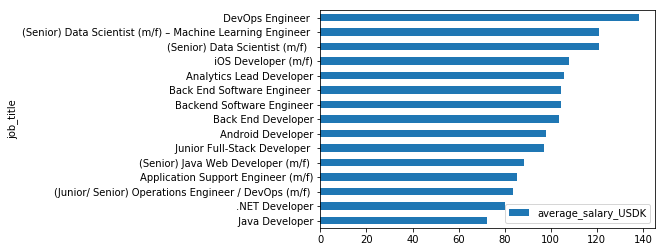

In [985]:
jobs_vs_salary.sort_values(by='average_salary_USDK').plot.barh(title= )

Result that is very inspiring for people like me working on Data Science! ;)